최단 경로: (0, 3, 6, 2, 5, 4, 1)
최단 거리: 15.520763132540633


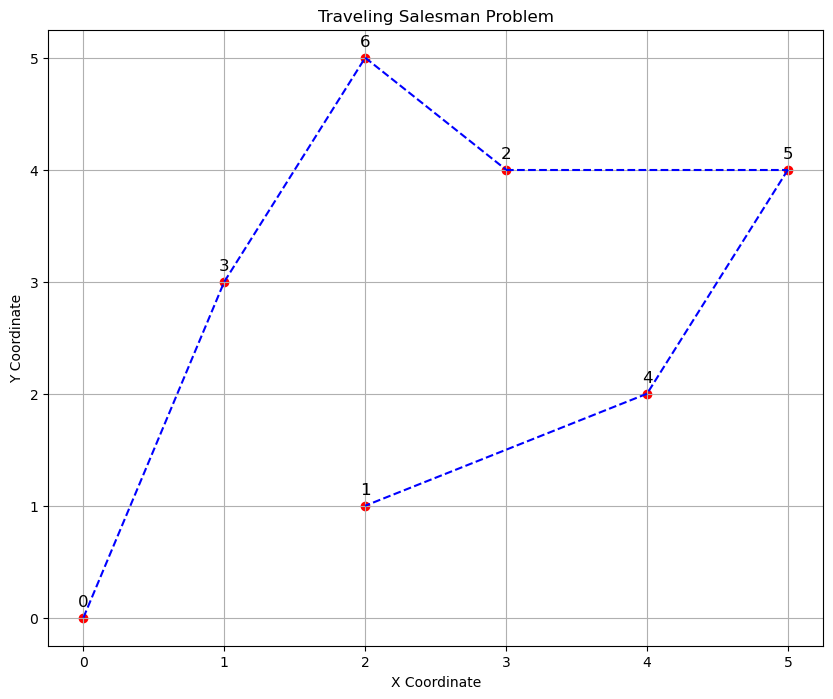

In [17]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def calculate_distance(coord1, coord2):
    """두 점 사이의 유클리디안 거리를 계산하는 함수"""
    return np.linalg.norm(np.array(coord1) - np.array(coord2))

def generate_distance_matrix(city_coordinates):
    """도시 좌표를 기반으로 거리 행렬을 생성하는 함수"""
    n = len(city_coordinates)
    distances = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            distances[i][j] = calculate_distance(city_coordinates[i], city_coordinates[j])
    
    return distances.tolist()

def tsp_brute_force(distances):
    n = len(distances)
    min_path = None
    min_dist = float('inf')
    
    # 0번 도시를 시작으로 하여 모든 도시를 한 번씩 방문하는 순열을 생성
    for path in itertools.permutations(range(1, n)):
        current_dist = distances[0][path[0]]  # 0번 도시에서 첫 번째 도시로의 거리
        
        for i in range(n - 2):  # 마지막 도시를 제외한 모든 도시에 대해 거리 계산
            current_dist += distances[path[i]][path[i + 1]]
        
        current_dist += distances[path[-1]][0]  # 마지막 도시에서 0번 도시로의 거리
        
        if current_dist < min_dist:
            min_dist = current_dist
            min_path = path
    
    min_path = (0,) + min_path
    return min_path, min_dist

# 도시 좌표 설정 (7개의 도시)
city_coordinates = [
    (0, 0),
    (2, 1),
    (3, 4),
    (1, 3),
    (4, 2),
    (5, 4),
    (2, 5)
]

# 거리 행렬 생성
distances = generate_distance_matrix(city_coordinates)
# print(distances)

# 함수 호출 및 결과 저장
path, min_distance = tsp_brute_force(distances)
print(f"최단 경로: {path}")
print(f"최단 거리: {min_distance}")

# 결과 시각화
plt.figure(figsize=(10, 8))

# 도시 좌표 시각화
for i, (x, y) in enumerate(city_coordinates):
    plt.scatter(x, y, color='red')
    plt.text(x, y + 0.1, f'{i}', fontsize=12, ha='center')

# 경로 시각화
for i in range(len(path) - 1):
    start_city = path[i]
    end_city = path[(i + 1) % len(path)]  # 마지막 도시에서 첫 도시로 연결
    start_x, start_y = city_coordinates[start_city]
    end_x, end_y = city_coordinates[end_city]
    plt.plot([start_x, end_x], [start_y, end_y], 'b--')

plt.title('Traveling Salesman Problem')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


최적 경로: [2, 3, 0, 1, 4, 5, 6]
최적 경로의 거리: 1.2943313403698942


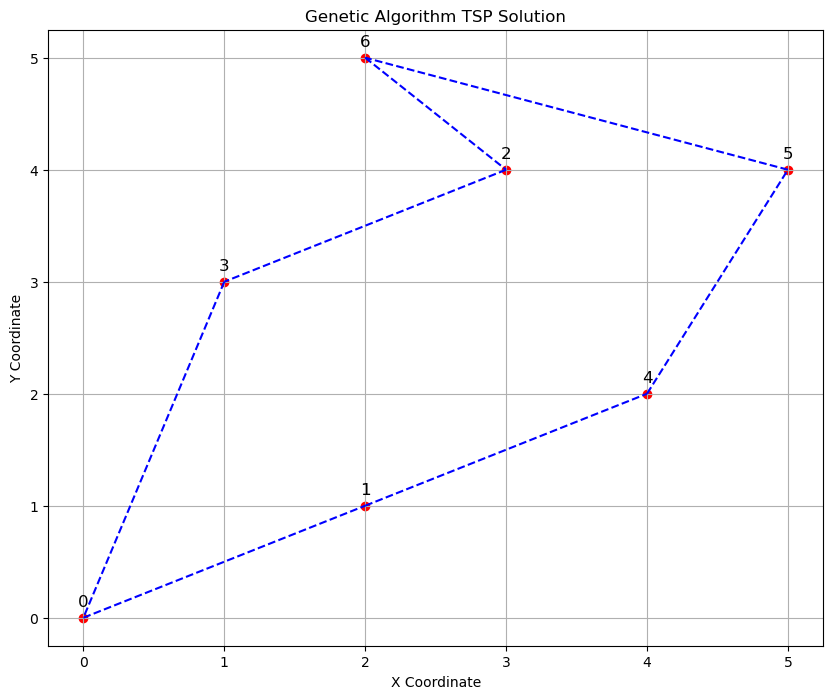

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 도시 좌표 설정 (7개의 도시)
city_coordinates = [
    (0, 0),
    (2, 1),
    (3, 4),
    (1, 3),
    (4, 2),
    (5, 4),
    (2, 5)
]

# 거리 행렬 생성
distances = [[np.linalg.norm(np.array(coord1) - np.array(coord2)) for coord2 in city_coordinates] for coord1 in city_coordinates]

# 유전 알고리즘 파라미터 설정
POP_SIZE = 50  # 개체 집단 크기
MUTATION_RATE = 0.1  # 돌연변이 확률
NUM_GENERATIONS = 100  # 세대 수

# 초기 개체 생성 (랜덤 순열)
population = [np.random.permutation(len(city_coordinates)).tolist() for _ in range(POP_SIZE)]

def evaluate(individual):
    """개체의 적합도(거리의 역수) 계산"""
    return 1.0 / sum(distances[individual[i]][individual[i + 1]] for i in range(len(individual) - 1)) + 1.0 / distances[individual[-1]][individual[0]]

def select_parents(population):
    """룰렛 휠 선택 방법으로 부모 선택"""
    fitness_values = [evaluate(individual) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    
    parents = np.random.choice(len(population), size=2, p=probabilities, replace=False)
    return [population[parent] for parent in parents]

def crossover(parents):
    """순서 교차(crossover)를 사용하여 자식 개체 생성"""
    parent1, parent2 = parents
    child = [-1] * len(parent1)
    
    start, end = sorted([np.random.randint(0, len(parent1)) for _ in range(2)])
    child[start:end + 1] = parent1[start:end + 1]
    
    idx = 0
    for i in range(len(parent2)):
        if parent2[i] not in child:
            while child[idx] != -1:
                idx += 1
            child[idx] = parent2[i]
    
    return child

def mutate(individual):
    """개체를 돌연변이(mutate)"""
    if np.random.rand() < MUTATION_RATE:
        idx1, idx2 = sorted(np.random.randint(0, len(individual), size=2))
        individual[idx1:idx2 + 1] = individual[idx1:idx2 + 1][::-1]
    return individual

# 메인 유전 알고리즘 루프
for generation in range(NUM_GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE // 2):
        parents = select_parents(population)
        child1 = crossover(parents)
        child2 = crossover(parents[::-1])
        
        child1 = mutate(child1)
        child2 = mutate(child2)
        
        new_population.extend([child1, child2])
    
    population = new_population

# 최적의 개체 선택
best_individual = max(population, key=evaluate)
best_distance = 1.0 / evaluate(best_individual)

print(f"최적 경로: {best_individual}")
print(f"최적 경로의 거리: {best_distance}")

# 결과 시각화
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(city_coordinates):
    plt.scatter(x, y, color='red')
    plt.text(x, y + 0.1, f'{i}', fontsize=12, ha='center')

for i in range(len(best_individual)):
    start_city = best_individual[i]
    end_city = best_individual[(i + 1) % len(best_individual)]
    start_x, start_y = city_coordinates[start_city]
    end_x, end_y = city_coordinates[end_city]
    plt.plot([start_x, end_x], [start_y, end_y], 'b--')

plt.title('Genetic Algorithm TSP Solution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()
